In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("C://Users//youss//Desktop//IRIS.csv")

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.duplicated().sum()

3

In [7]:
data =data.drop_duplicates()

In [8]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
species_counts = data['species'].value_counts()
data['species']=data['species'].str.replace('Iris-','')


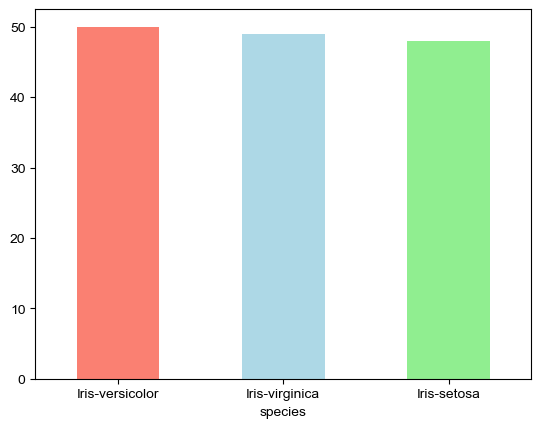

In [11]:
species_counts.plot(
    kind="bar", color=["salmon", "lightblue", "lightgreen"])
plt.xticks(rotation=0)

plt.style.use("default")
plt.style.use("seaborn-whitegrid")

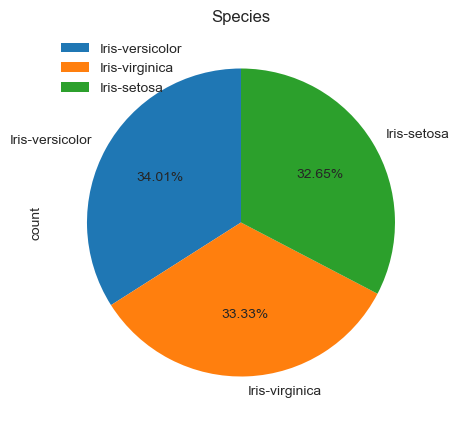

In [12]:
plt.figure(figsize=(5,5))
species_counts.plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title('Species')
plt.legend(loc='upper left', labels=species_counts.index)
plt.show()

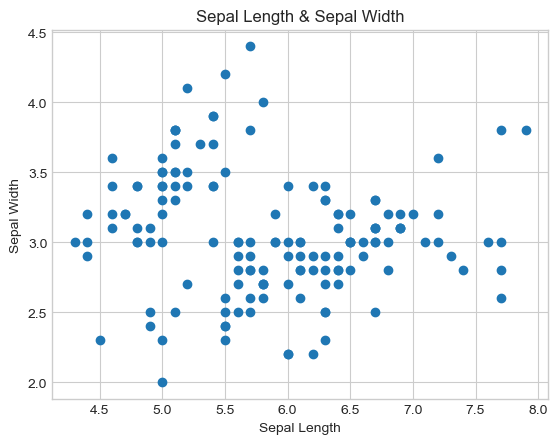

In [13]:
plt.scatter(data['sepal_length'], data['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length & Sepal Width')
plt.show()

Text(0, 0.5, 'Count')

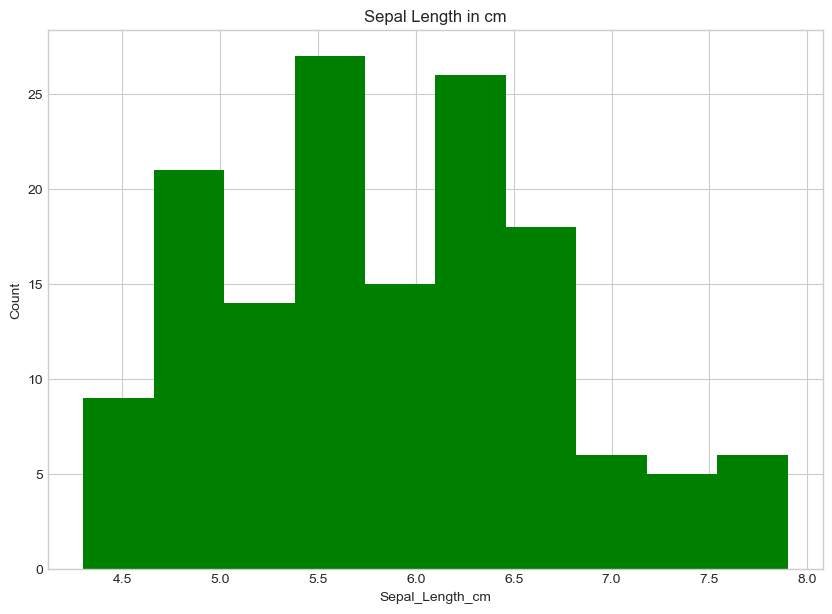

In [14]:
plt.figure(figsize = (10, 7)) 
x = data["sepal_length"] 
plt.hist(x, bins = 10, color = "green") 
plt.title("Sepal Length in cm") 
plt.xlabel("Sepal_Length_cm") 
plt.ylabel("Count")

Text(0, 0.5, 'Count')

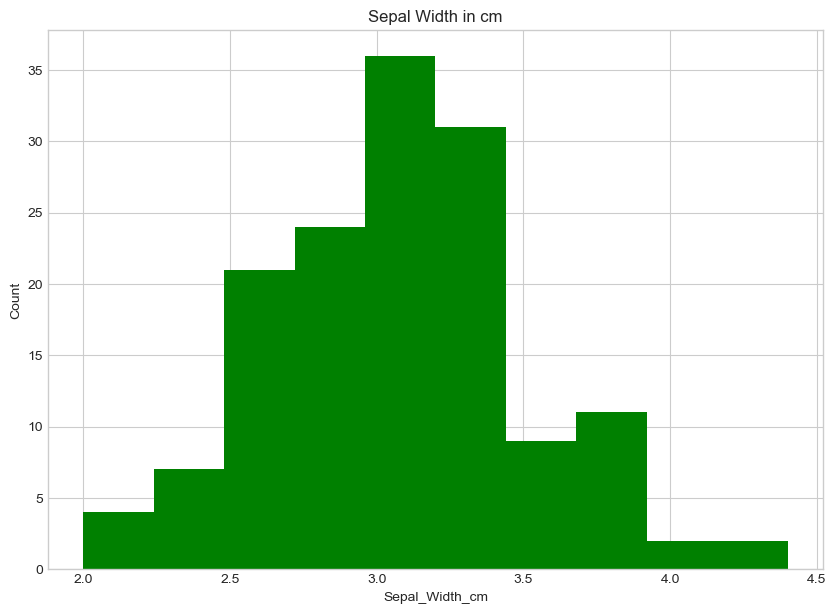

In [15]:
plt.figure(figsize = (10, 7)) 
x = data["sepal_width"] 
plt.hist(x, bins = 10, color = "green") 
plt.title("Sepal Width in cm") 
plt.xlabel("Sepal_Width_cm") 
plt.ylabel("Count")

Text(0, 0.5, 'Count')

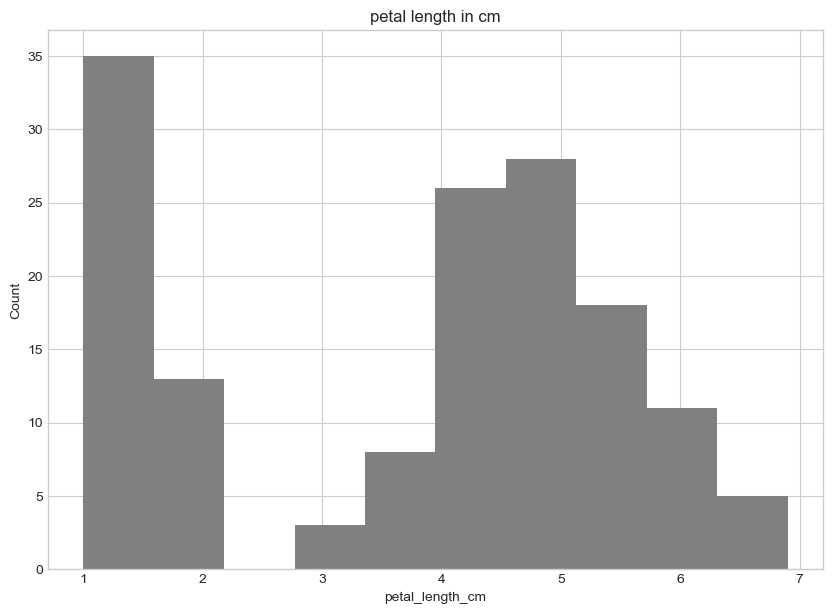

In [16]:
plt.figure(figsize = (10, 7)) 
x = data["petal_length"] 
plt.hist(x, bins = 10, color = "grey") 
plt.title("petal length in cm") 
plt.xlabel("petal_length_cm") 
plt.ylabel("Count")

Text(0, 0.5, 'Count')

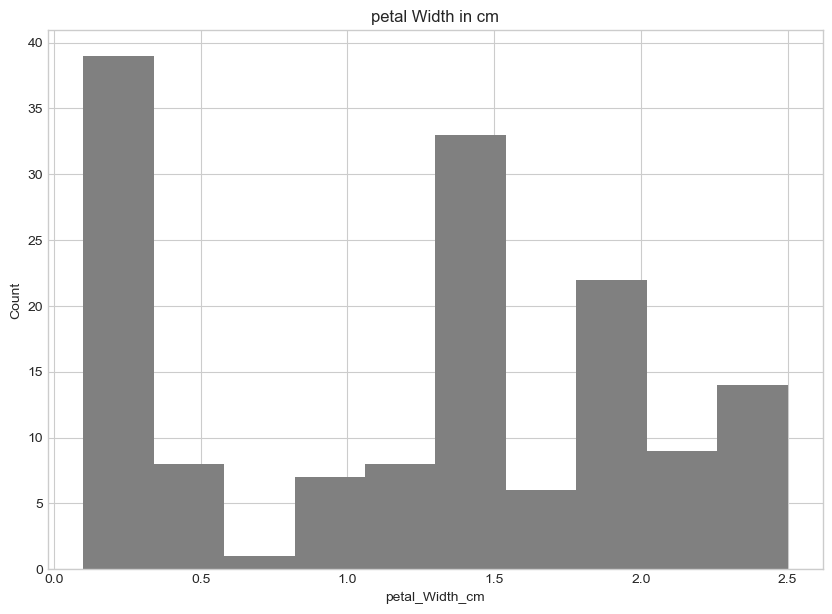

In [17]:
plt.figure(figsize = (10, 7)) 
x = data["petal_width"] 
plt.hist(x, bins = 10, color = "grey") 
plt.title("petal Width in cm") 
plt.xlabel("petal_Width_cm") 
plt.ylabel("Count")

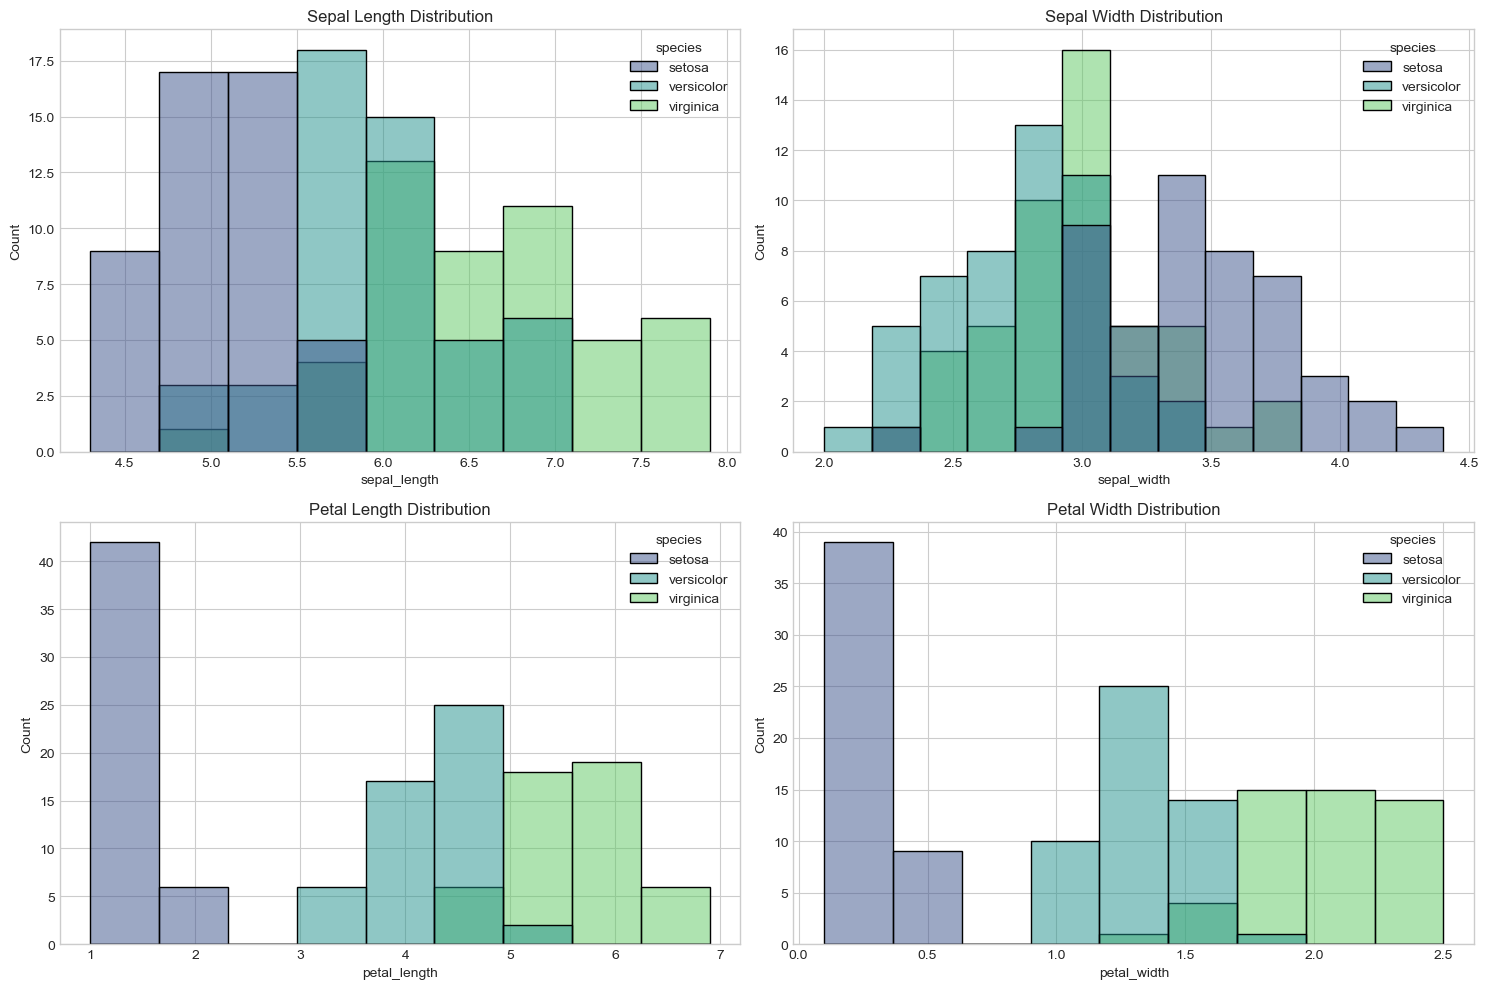

In [18]:
palette = "viridis"

plt.figure(figsize=(15, 10))

# Histograms for sepal length, sepal width, petal length, and petal width
plt.subplot(2, 2, 1)
sns.histplot(data=data, x="sepal_length", hue="species", palette=palette)
plt.title("Sepal Length Distribution")

plt.subplot(2, 2, 2)
sns.histplot(data=data, x="sepal_width", hue="species", palette=palette)
plt.title("Sepal Width Distribution")

plt.subplot(2, 2, 3)
sns.histplot(data=data, x="petal_length", hue="species", palette=palette)
plt.title("Petal Length Distribution")

plt.subplot(2, 2, 4)
sns.histplot(data=data, x="petal_width", hue="species", palette=palette)
plt.title("Petal Width Distribution")

plt.tight_layout()

Text(0.5, 1.0, 'Sepal Length Box Plot')

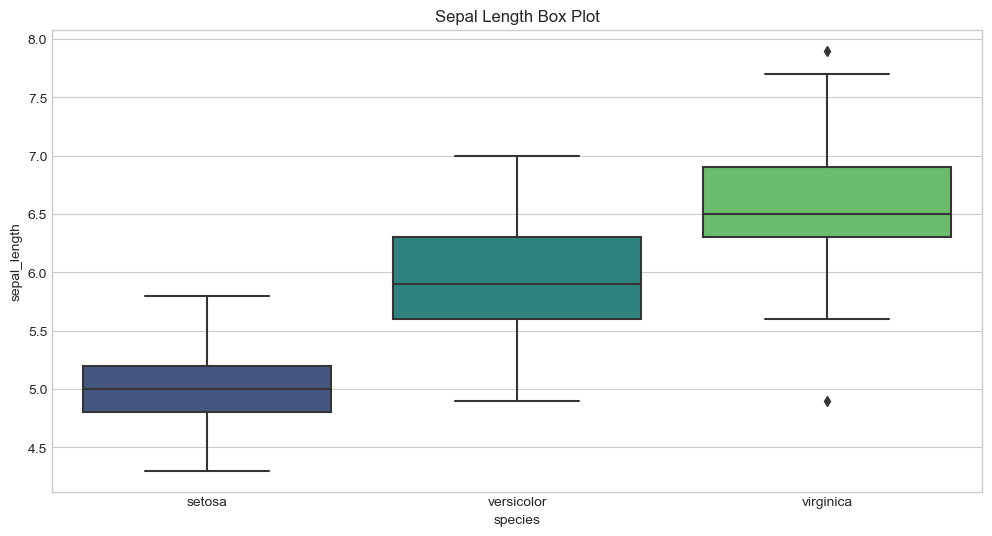

In [19]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="species", y="sepal_length", palette=palette)
plt.title("Sepal Length Box Plot")


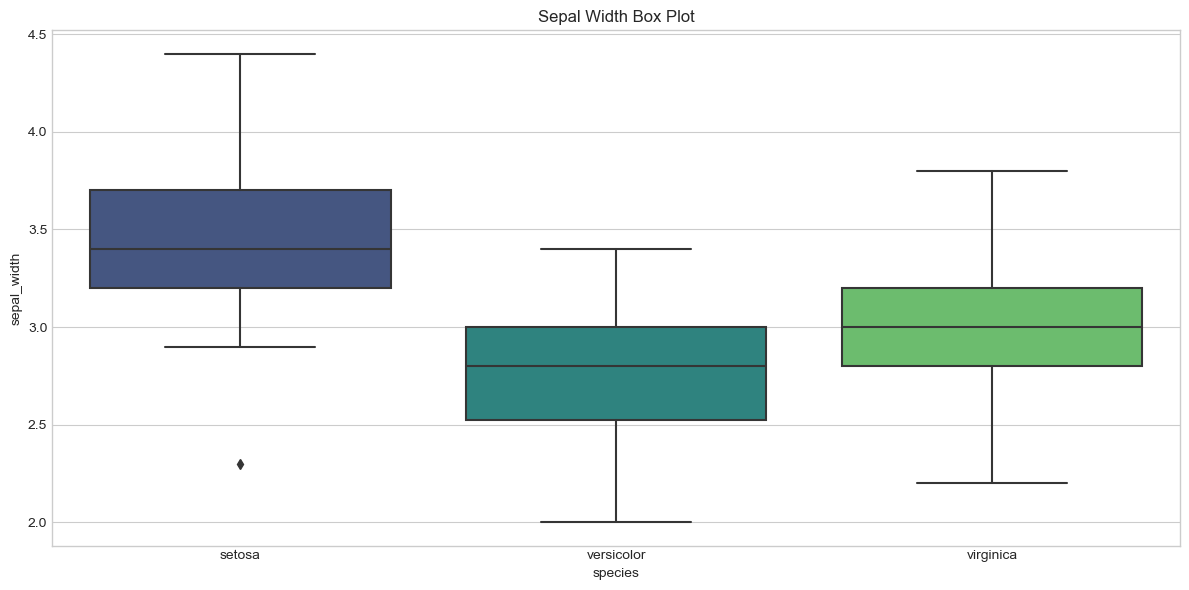

In [20]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="species", y="sepal_width", palette=palette)
plt.title("Sepal Width Box Plot")



plt.tight_layout()

Text(0.5, 1.0, 'Petal Length Box Plot')

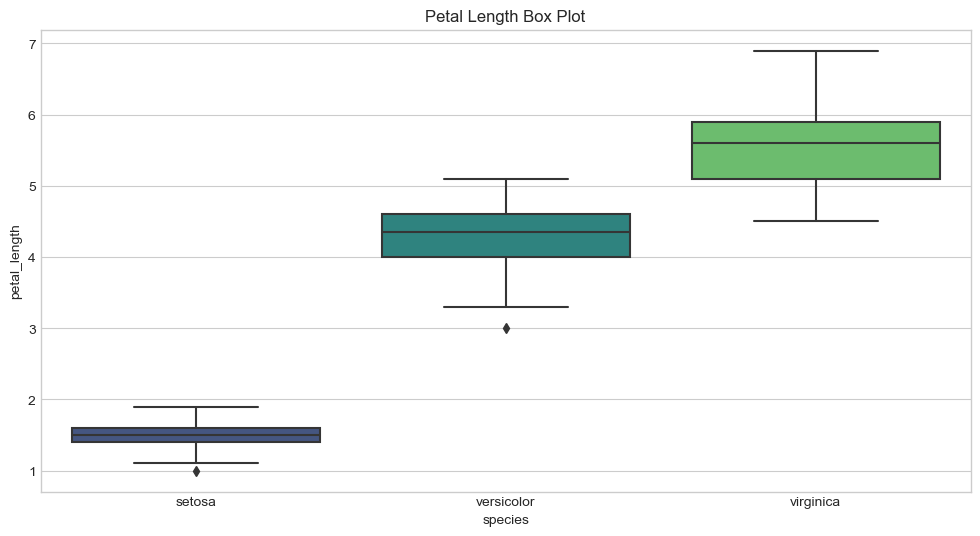

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="species", y="petal_length", palette=palette)
plt.title("Petal Length Box Plot")



Text(0.5, 1.0, 'Petal Width Box Plot')

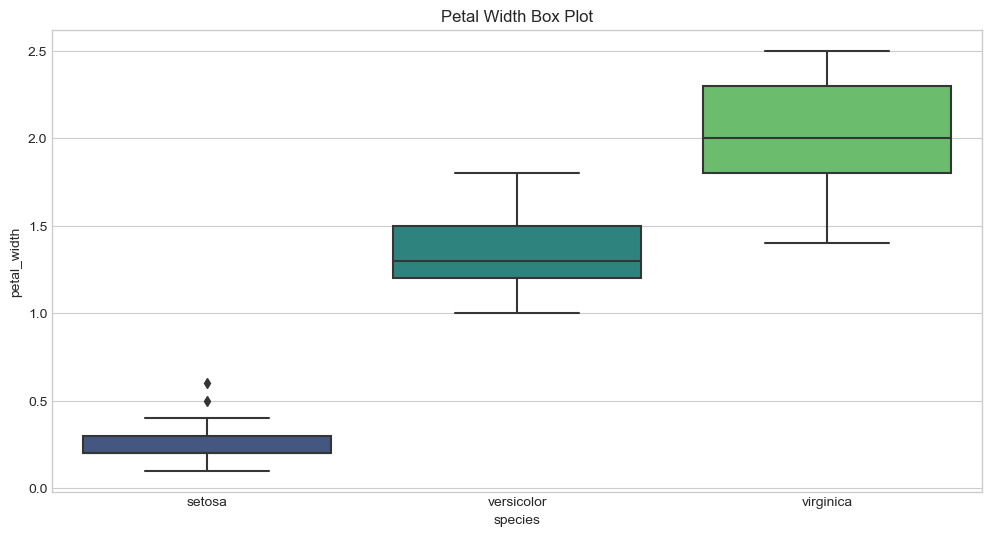

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="species", y="petal_width", palette=palette)
plt.title("Petal Width Box Plot")

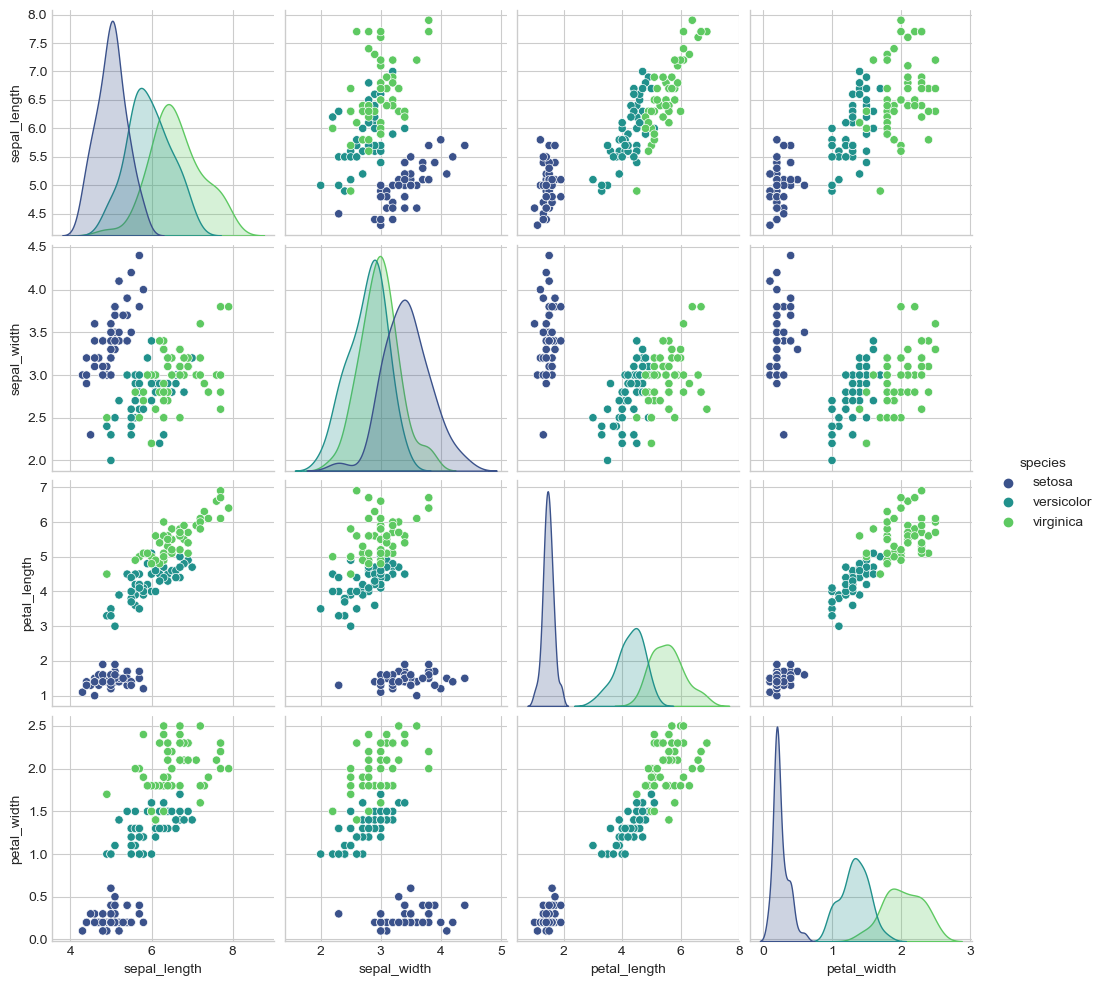

In [23]:
sns.set_style('whitegrid')
sns.pairplot(data, hue='species', palette=palette)
plt.show()

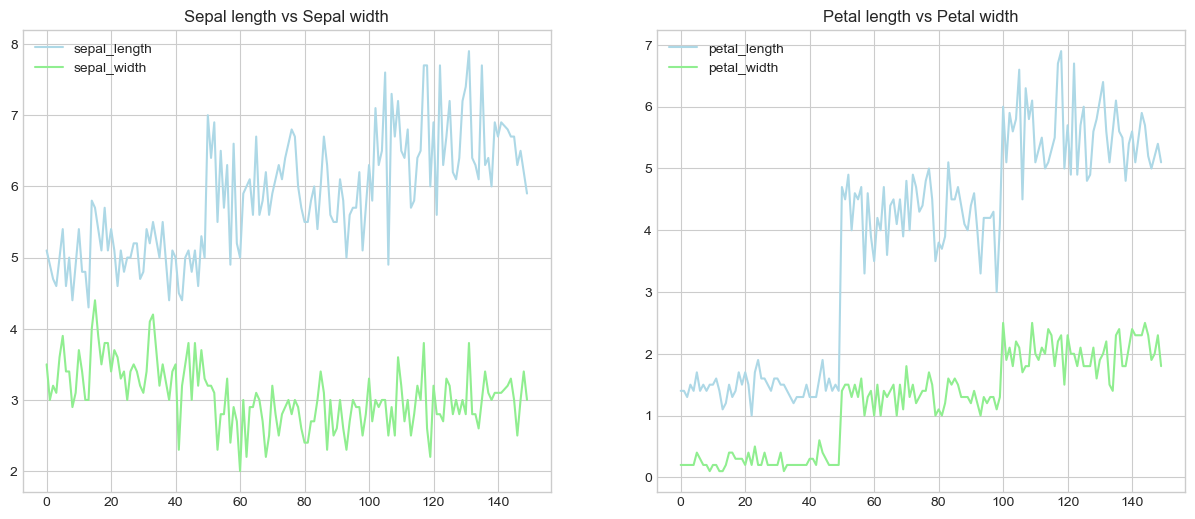

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(data['sepal_length'], label='sepal_length',color='lightblue')
ax[0].plot(data['sepal_width'], label='sepal_width',color='lightgreen')
ax[0].set_title('Sepal length vs Sepal width')
ax[0].legend()

ax[1].plot(data['petal_length'], label='petal_length',color='lightblue')
ax[1].plot(data['petal_width'], label='petal_width',color='lightgreen')
ax[1].set_title('Petal length vs Petal width')
ax[1].legend()

plt.show()

In [25]:
X = data.drop('species', axis=1)
y = data['species']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

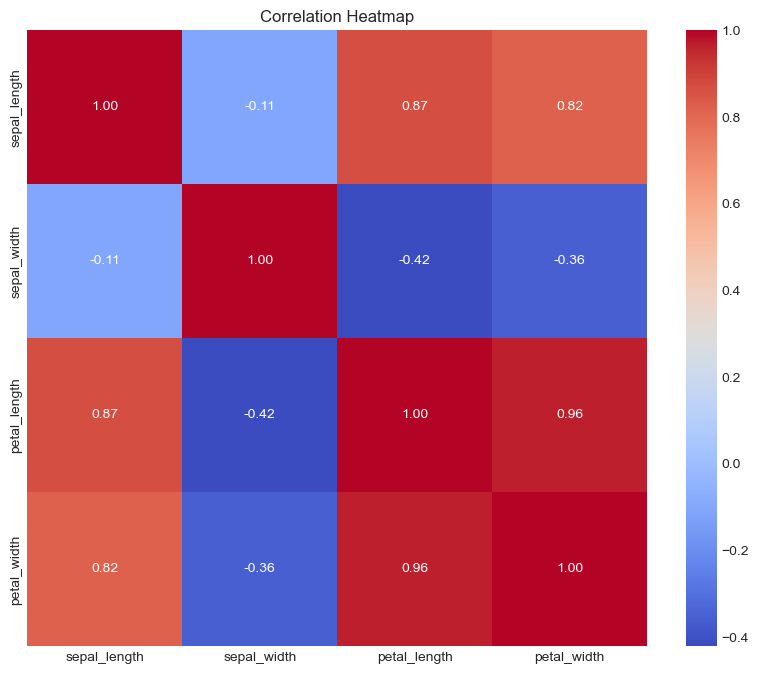

In [27]:
plt.figure(figsize=(10, 8))  
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [28]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      0.90      0.90        10
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [29]:
Logist = LogisticRegression(max_iter=10)

In [30]:
Logist.fit(X_train,y_train)

LogisticRegression(max_iter=10)

In [31]:
Logist.score(X_train, y_train)

0.9829059829059829

In [32]:
y_predict = Logist.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.9333333333333333

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
knn.score(X_train, y_train)

0.9829059829059829

In [37]:
y_predict = knn.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.9333333333333333